In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',10)
pd.set_option('display.precision',4)

In [5]:
df = pd.read_excel('大圣归来-电影评分与评论.xlsx')

In [6]:
df.head(2)

,Star,Comment
0,4,有人说挺《小时代》的人都将在电影史耻辱柱上有一席之地。那么给《大圣归来》的打一星的人也是如...
1,4,京剧+摇滚+大话西游配乐，孙猴如何解印、老师傅咋来悬空寺是败笔，但有气魄、胆识、干劲、瑕不...


In [8]:
df['Comment'][0]

' 有人说挺《小时代》的人都将在电影史耻辱柱上有一席之地。那么给《大圣归来》的打一星的人也是如此！此片真称不上什么神作，但打一星的人心理够阴暗啊，天天喷国产片垃圾，出了一部质量尚可的却跑来打压，从垃圾跃进到好莱坞靠嘴喷即可？若喷最狠的人连票都没买，那我还真是没见过这么厚颜无耻的人了！'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133393 entries, 0 to 133392
Data columns (total 2 columns):
Star       133393 non-null int64
Comment    133393 non-null object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [10]:
df.duplicated().sum()

7037

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126356 entries, 0 to 133392
Data columns (total 2 columns):
Star       126356 non-null int64
Comment    126356 non-null object
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [13]:
df.head(2)

,Star,Comment
0,4,有人说挺《小时代》的人都将在电影史耻辱柱上有一席之地。那么给《大圣归来》的打一星的人也是如...
1,4,京剧+摇滚+大话西游配乐，孙猴如何解印、老师傅咋来悬空寺是败笔，但有气魄、胆识、干劲、瑕不...


In [14]:

allcomments = ' '.join(df['Comment'])

In [16]:
allcomments[:200]

' 有人说挺《小时代》的人都将在电影史耻辱柱上有一席之地。那么给《大圣归来》的打一星的人也是如此！此片真称不上什么神作，但打一星的人心理够阴暗啊，天天喷国产片垃圾，出了一部质量尚可的却跑来打压，从垃圾跃进到好莱坞靠嘴喷即可？若喷最狠的人连票都没买，那我还真是没见过这么厚颜无耻的人了！  京剧+摇滚+大话西游配乐，孙猴如何解印、老师傅咋来悬空寺是败笔，但有气魄、胆识、干劲、瑕不遮瑜。大闹天宫，3D红绫'

In [17]:
import jieba

In [19]:
jieba.lcut('他毕业于上海交通大学机电系',cut_all=True)

['他', '毕业', '于', '上海', '上海交通大学', '交通', '大学', '机电', '系']

In [20]:
jieba.add_word('机电系')
jieba.lcut('他毕业于上海交通大学机电系')

['他', '毕业', '于', '上海交通大学', '机电系']

In [21]:
jieba.del_word('机电系')
jieba.lcut('他毕业于上海交通大学机电系')

['他', '毕业', '于', '上海交通大学', '机电', '系']

In [22]:
jieba.suggest_freq(('中','将'), True)
jieba.lcut('如果放到post中将出错')

['如果', '放到', 'post', '中', '将', '出错']

In [24]:
jieba.suggest_freq(('中', '将'), True)
jieba.lcut('如果放到post中将出错')

['如果', '放到', 'post', '中', '将', '出错']

In [25]:
jieba.lcut('“台中”不应该被切开。')

['“', '台', '中', '”', '不', '应该', '被', '切开', '。']

In [26]:
jieba.suggest_freq('台中', True)
jieba.suggest_freq('不应该', True)
jieba.lcut('“台中”不应该被切开。')

['“', '台中', '”', '不应该', '被', '切开', '。']

In [27]:
words = jieba.lcut(allcomments[:len(allcomments)//3])

In [30]:
words_series = pd.Series(words)

In [33]:
word_freq = words_series.value_counts()

In [40]:
sw = open('stopwords.txt',encoding='utf-8').read()

In [41]:
sw[:50]

'\ufeff! " # $ % & \' ( ) * + , - -- . .. ... ...... ....'

In [44]:
swlist = sw[1:].split()

In [45]:
swlist[:10]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [48]:
word_freq = word_freq[~word_freq.index.isin(swlist)]

In [49]:
word_freq[:20]

      104109
国产      9888
动画      9807
剧情      7888
大圣      7680
不错      4506
电影      3947
良心      3943
画面      3934
故事      3766
中国      3629
真的      3339
太       3147
说       3100
制作      2687
感觉      2422
效果      2251
特效      2097
希望      2093
配乐      2086
dtype: int64

In [50]:
word_freq = word_freq[word_freq.index.str.len() > 1]

In [52]:
word_freq[:50]

国产     9888
动画     9807
剧情     7888
大圣     7680
不错     4506
电影     3947
良心     3943
画面     3934
故事     3766
中国     3629
真的     3339
制作     2687
感觉     2422
效果     2251
特效     2097
希望     2093
配乐     2086
好看     2052
猴子     2041
动画片    2027
之作     1880
江流     1864
一部     1859
喜欢     1761
情节     1751
孙悟空    1747
确实     1662
支持     1646
3D     1601
鼓励     1587
结尾     1548
汪峰     1538
期待     1480
五星     1473
诚意     1385
归来     1363
动漫     1298
英雄     1294
情怀     1257
人物     1252
这部     1223
国漫     1190
片子     1169
用心     1150
感动     1141
细节     1130
四星     1125
配音     1124
三星     1122
值得     1104
dtype: int64

In [53]:
my_sw_list = ['真的','感觉','之作','一部','确实','这部','片子']
word_freq = word_freq[~word_freq.index.isin(my_sw_list)]
word_freq.index[:50]

Index(['国产', '动画', '剧情', '大圣', '不错', '电影', '良心', '画面', '故事', '中国', '制作', '效果',
       '特效', '希望', '配乐', '好看', '猴子', '动画片', '江流', '喜欢', '情节', '孙悟空', '支持',
       '3D', '鼓励', '结尾', '汪峰', '期待', '五星', '诚意', '归来', '动漫', '英雄', '情怀', '人物',
       '国漫', '用心', '感动', '细节', '四星', '配音', '三星', '值得', '一星', '动画电影', '作品',
       '简单', '好莱坞', '技术', '音乐'],
      dtype='object')

In [54]:
from wordcloud import WordCloud

In [56]:
content = open('RomeoandJuliet.txt').read()

In [57]:
mycloud = WordCloud().generate(content)

In [58]:
import matplotlib.pyplot as plt

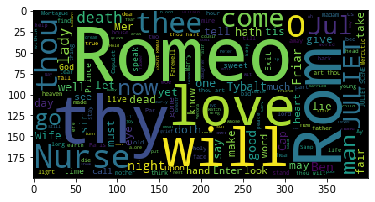

In [62]:
plt.imshow(mycloud);